In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-math.csv to student-math.csv


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('student-math.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
#Converting all object data type into numeric values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
a_school=LabelEncoder()
a_address=LabelEncoder()
a_famsize=LabelEncoder()
a_sex=LabelEncoder()
a_Pstatus=LabelEncoder()
a_Mjob=LabelEncoder()
a_Fjob=LabelEncoder()
a_reason=LabelEncoder()
a_guardian=LabelEncoder()
a_scoolsup=LabelEncoder()
a_famsup=LabelEncoder()
a_paid=LabelEncoder()
a_activities=LabelEncoder()
a_nursery=LabelEncoder()
a_higher=LabelEncoder()
a_internet=LabelEncoder()
a_romantic=LabelEncoder()

df["school"]=a_school.fit_transform(df["school"])
df["sex"]=a_sex.fit_transform(df["sex"])
df["address"]=a_address.fit_transform(df["address"])
df["famsize"]=a_famsize.fit_transform(df["famsize"])
df["Pstatus"]=a_Pstatus.fit_transform(df["Pstatus"])
df["Mjob"]=a_Mjob.fit_transform(df["Mjob"])
df["Fjob"]=a_Fjob.fit_transform(df["Fjob"])
df["reason"]=a_reason.fit_transform(df["reason"])
df["guardian"]=a_guardian.fit_transform(df["guardian"])
df["schoolsup"]=a_scoolsup.fit_transform(df["schoolsup"])
df["famsup"]=a_famsup.fit_transform(df["famsup"])
df["paid"]=a_paid.fit_transform(df["paid"])
df["activities"]=a_activities.fit_transform(df["activities"])
df["nursery"]=a_nursery.fit_transform(df["nursery"])
df["higher"]=a_higher.fit_transform(df["higher"])
df["internet"]=a_internet.fit_transform(df["internet"])
df["romantic"]=a_romantic.fit_transform(df["romantic"])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
#Creating a "final_grade" Column
df["final_grade"]=df['G1'] + df['G2'] + df['G3']

In [0]:
#	Initialize a variable x which shall contain every other column except “G3”.
x=df.iloc[:,:-2]


In [0]:
#	Initialize a variable y which shall contain the output column, i.e., final_grade
y=df.iloc[:,-1]

In [0]:
#Splitting the dataset into Training and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [0]:
#Creating a Linear Regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [10]:
#Fitting the data into the model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Predicting the result
predict= np.int64(model.predict(X_test))
print(predict)

[42 32 28 46 47 37 38 31 25 45 23 38 33 23 43 42 35 27 28 43 19 13 20 42
 35 46 28 57 10 36  3 22 24 17 39 32 35 53 25 35 14 55 23 23 30  2 34 15
 35 19 29 52 34 25 36 24 29 36 43 40 38 41 41 48 26 46 54 37 15 27 26 40
 21 14 31 24 30 52 18]


In [12]:
#Checking the Accuracy score  
print("Training dataset Score :",model.score(X_train,y_train))
print("Testing dataset Score :",model.score(X_test,y_test))
print("Actual data VS predicted data Score :",model.score(X_test,predict))


Training dataset Score : 0.9754256205057238
Testing dataset Score : 0.9628869333009973
Actual data VS predicted data Score : 0.9976819152428014


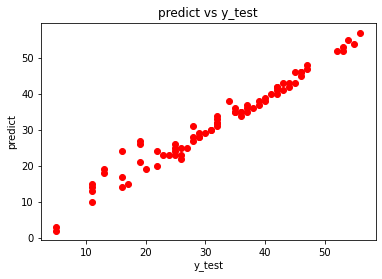

In [13]:
#scatter plot between the true and predicted values 
plt.scatter(y_test,predict,color='red')
plt.title('predict vs y_test')
plt.xlabel('y_test')
plt.ylabel('predict')
plt.show()

In [14]:
# Creating the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p > SL

import statsmodels.regression.linear_model as sm 
x = np.append(arr = np.ones((395, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, :] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     413.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          6.74e-264
Time:                        04:30:26   Log-Likelihood:                -794.26
No. Observations:                 395   AIC:                             1655.
Df Residuals:                     362   BIC:                             1786.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3293      1.906     -0.173      0.8

In [15]:
#remove 4th column
x_opt=x [:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())



                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     428.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.25e-265
Time:                        04:30:26   Log-Likelihood:                -794.26
No. Observations:                 395   AIC:                             1653.
Df Residuals:                     363   BIC:                             1780.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3005      1.885     -0.159      0.8

In [16]:
#remove 5th column
x_opt=x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]]   
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     443.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.55e-266
Time:                        04:30:26   Log-Likelihood:                -794.28
No. Observations:                 395   AIC:                             1651.
Df Residuals:                     364   BIC:                             1774.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      1.880     -0.153      0.8

In [17]:
#remove 19th column
x_opt=x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32]]   
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     455.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          4.00e-267
Time:                        04:30:26   Log-Likelihood:                -796.15
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     365   BIC:                             1772.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2400      1.887     -0.127      0.8

In [18]:
#remove 18th column
x_opt=x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     473.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.93e-268
Time:                        04:30:26   Log-Likelihood:                -796.21
No. Observations:                 395   AIC:                             1650.
Df Residuals:                     366   BIC:                             1766.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2654      1.883     -0.141      0.8

In [19]:
#remove 17th column
x_opt=x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     490.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.33e-269
Time:                        04:30:26   Log-Likelihood:                -796.67
No. Observations:                 395   AIC:                             1649.
Df Residuals:                     367   BIC:                             1761.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1720      1.880     -0.092      0.9

In [20]:
#remove 16th column
x_opt=x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     507.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.77e-270
Time:                        04:30:26   Log-Likelihood:                -797.87
No. Observations:                 395   AIC:                             1650.
Df Residuals:                     368   BIC:                             1757.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5068      1.827      0.277      0.7

In [21]:
#remove 7th column
x_opt=x[:, [0,1,2,3,6,8,9,10,11,12,13,14,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     528.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.20e-271
Time:                        04:30:26   Log-Likelihood:                -798.36
No. Observations:                 395   AIC:                             1649.
Df Residuals:                     369   BIC:                             1752.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6505      1.821      0.357      0.7

In [22]:
#remove 14th column
x_opt=x[:, [0,1,2,3,6,8,9,10,11,12,13,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     550.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          7.23e-273
Time:                        04:30:26   Log-Likelihood:                -798.74
No. Observations:                 395   AIC:                             1647.
Df Residuals:                     370   BIC:                             1747.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5715      1.817      0.314      0.7

In [23]:
#remove 13th column
x_opt=x[:, [0,1,2,3,6,8,9,10,11,12,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     575.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.74e-274
Time:                        04:30:26   Log-Likelihood:                -798.99
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     371   BIC:                             1741.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8335      1.774      0.470      0.6

In [24]:
#remove 12th column
x_opt=x[:, [0,1,2,3,6,8,9,10,11,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     602.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.72e-275
Time:                        04:30:26   Log-Likelihood:                -799.13
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     372   BIC:                             1736.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7493      1.765      0.425      0.6

In [25]:
#remove 11th column
x_opt=x[:, [0,1,2,3,6,8,9,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     632.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          8.76e-277
Time:                        04:30:26   Log-Likelihood:                -799.41
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     373   BIC:                             1730.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8071      1.762      0.458      0.6

In [26]:
#remove 10th column
x_opt=x[:, [0,1,2,3,6,8,9,15,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     663.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          5.73e-278
Time:                        04:30:26   Log-Likelihood:                -799.97
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     374   BIC:                             1726.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5003      1.737      0.288      0.7

In [27]:
#remove 15th column
x_opt=x[:, [0,1,2,3,6,8,9,20,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     696.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          5.60e-279
Time:                        04:30:26   Log-Likelihood:                -800.99
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     375   BIC:                             1722.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4494      1.739      0.258      0.7

In [28]:
#remove 20th column
x_opt=x[:, [0,1,2,3,6,8,9,21,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     736.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          2.41e-280
Time:                        04:30:26   Log-Likelihood:                -801.17
No. Observations:                 395   AIC:                             1640.
Df Residuals:                     376   BIC:                             1716.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3097      1.721      0.180      0.8

In [29]:
#remove 21th column
x_opt=x[:, [0,1,2,3,6,8,9,22,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     781.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          9.47e-282
Time:                        04:30:26   Log-Likelihood:                -801.28
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     377   BIC:                             1710.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6032      1.601      0.377      0.7

In [30]:
#remove 22th column
x_opt=x[:, [0,1,2,3,6,8,9,23,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     831.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          4.03e-283
Time:                        04:30:26   Log-Likelihood:                -801.52
No. Observations:                 395   AIC:                             1637.
Df Residuals:                     378   BIC:                             1705.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4539      1.584      0.287      0.7

In [31]:
#remove 23th column
x_opt=x[:, [0,1,2,3,6,8,9,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     883.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          4.93e-284
Time:                        04:30:26   Log-Likelihood:                -802.88
No. Observations:                 395   AIC:                             1638.
Df Residuals:                     379   BIC:                             1701.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5555      1.586      0.350      0.7

In [32]:
#remove 9th column
x_opt=x[:, [0,1,2,3,6,8,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     948.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.64e-285
Time:                        04:30:26   Log-Likelihood:                -802.93
No. Observations:                 395   AIC:                             1636.
Df Residuals:                     380   BIC:                             1696.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5837      1.581      0.369      0.7

In [33]:
#remove 8th column
x_opt=x[:, [0,1,2,3,6,24,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1023.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          6.44e-287
Time:                        04:30:26   Log-Likelihood:                -803.19
No. Observations:                 395   AIC:                             1634.
Df Residuals:                     381   BIC:                             1690.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3137      1.533      0.205      0.8

In [34]:
#remove 24th column
x_opt=x[:, [0,1,2,3,6,25,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1078.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          5.19e-286
Time:                        04:30:26   Log-Likelihood:                -809.00
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     382   BIC:                             1696.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1199      1.535      0.730      0.4

In [35]:
#remove 25th column
x_opt=x[:, [0,1,2,3,6,26,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1176.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          2.17e-287
Time:                        04:30:27   Log-Likelihood:                -809.39
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     383   BIC:                             1691.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3240      1.516      0.873      0.3

In [36]:
#remove 26th column
x_opt=x[:, [0,1,2,3,6,27,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1296.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          6.79e-289
Time:                        04:30:27   Log-Likelihood:                -809.54
No. Observations:                 395   AIC:                             1641.
Df Residuals:                     384   BIC:                             1685.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4055      1.507      0.932      0.3

In [37]:
#remove 2nd column
x_opt=x[:, [0,1,3,6,28,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          7.97e-292
Time:                        04:30:27   Log-Likelihood:                -810.21
No. Observations:                 395   AIC:                             1638.
Df Residuals:                     386   BIC:                             1674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3859      1.506      0.920      0.3

In [38]:
#remove 28th column
x_opt=x[:, [0,1,3,6,29,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1853.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.58e-293
Time:                        04:30:27   Log-Likelihood:                -810.92
No. Observations:                 395   AIC:                             1638.
Df Residuals:                     387   BIC:                             1670.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4518      1.506      0.964      0.3

In [39]:
#remove 29th column
x_opt=x[:, [0,1,3,6,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2159.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.53e-294
Time:                        04:30:27   Log-Likelihood:                -811.66
No. Observations:                 395   AIC:                             1637.
Df Residuals:                     388   BIC:                             1665.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8824      1.464      1.286      0.1

In [40]:
#remove 3rd column
x_opt=x[:, [0,1,6,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2549.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.06e-294
Time:                        04:30:27   Log-Likelihood:                -815.34
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     389   BIC:                             1667.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8734      0.459     -4.079      0.0

In [41]:
#remove 1st column
x_opt=x[:, [0,6,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3193.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.81e-296
Time:                        04:30:27   Log-Likelihood:                -815.36
No. Observations:                 395   AIC:                             1641.
Df Residuals:                     390   BIC:                             1661.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8643      0.457     -4.081      0.0

In [42]:
#remove 6th column
x_opt=x[:, [0,30,31,32]]  
ols=sm.OLS(endog = y, exog=x_opt).fit()  
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4264.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.19e-298
Time:                        04:30:27   Log-Likelihood:                -815.59
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     391   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0675      0.341     -6.060      0.0

*Hence we can observe that only 3 features i.e(Absence,G1,G2) are capable for prediction.*

#After doing Backward elimination and by using 3 features we can again predict to see the result.

In [43]:
X_new=df[['absences','G1','G2']]
X_new.shape

(395, 3)

In [44]:
Y_new=df.iloc[:,-1]
Y_new.head()

0    17
1    16
2    25
3    44
4    26
Name: final_grade, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_new,Y_new,test_size = 0.2, random_state = 0)

In [46]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
np.int64(model.predict(X_test))

array([42, 32, 28, 46, 47, 37, 37, 31, 25, 46, 23, 36, 32, 22, 44, 42, 36,
       28, 27, 43, 18, 14, 20, 42, 35, 47, 28, 56, 10, 35,  3, 23, 24, 17,
       39, 32, 35, 54, 25, 35, 14, 54, 24, 24, 29,  3, 35, 14, 35, 19, 28,
       52, 32, 25, 35, 23, 29, 37, 42, 40, 39, 41, 42, 47, 27, 45, 54, 38,
       15, 27, 25, 40, 20, 14, 30, 24, 30, 53, 18])

In [48]:
#Checking the score using only 3 features 
print("Training dataset Score=",model.score(X_train,y_train))
print("Testing dataset Score",model.score(X_test,y_test))
print("Actual data VS predicted data Score",model.score(X_test,predict))

Training dataset Score= 0.9720517556998953
Testing dataset Score 0.9643217701018247
Actual data VS predicted data Score 0.9949865128269235


**Additional Visualisation Insights**

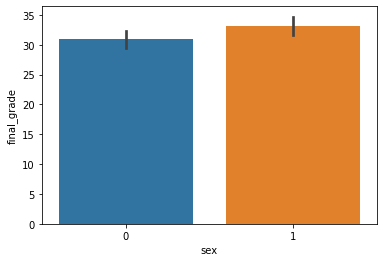

In [49]:
#Bar-plot that provide insight how the 'Gender' of the students relate their 'final_grade'
sns.barplot(x = 'sex', y = 'final_grade', data = df)

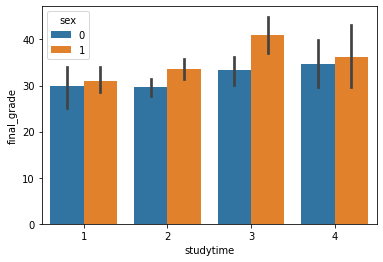

In [50]:
#Bar-plot that provide insights on how 'studytime' of students affects their 'final_grade'
sns.barplot(x = 'studytime', y = 'final_grade', data = df, hue = 'sex')

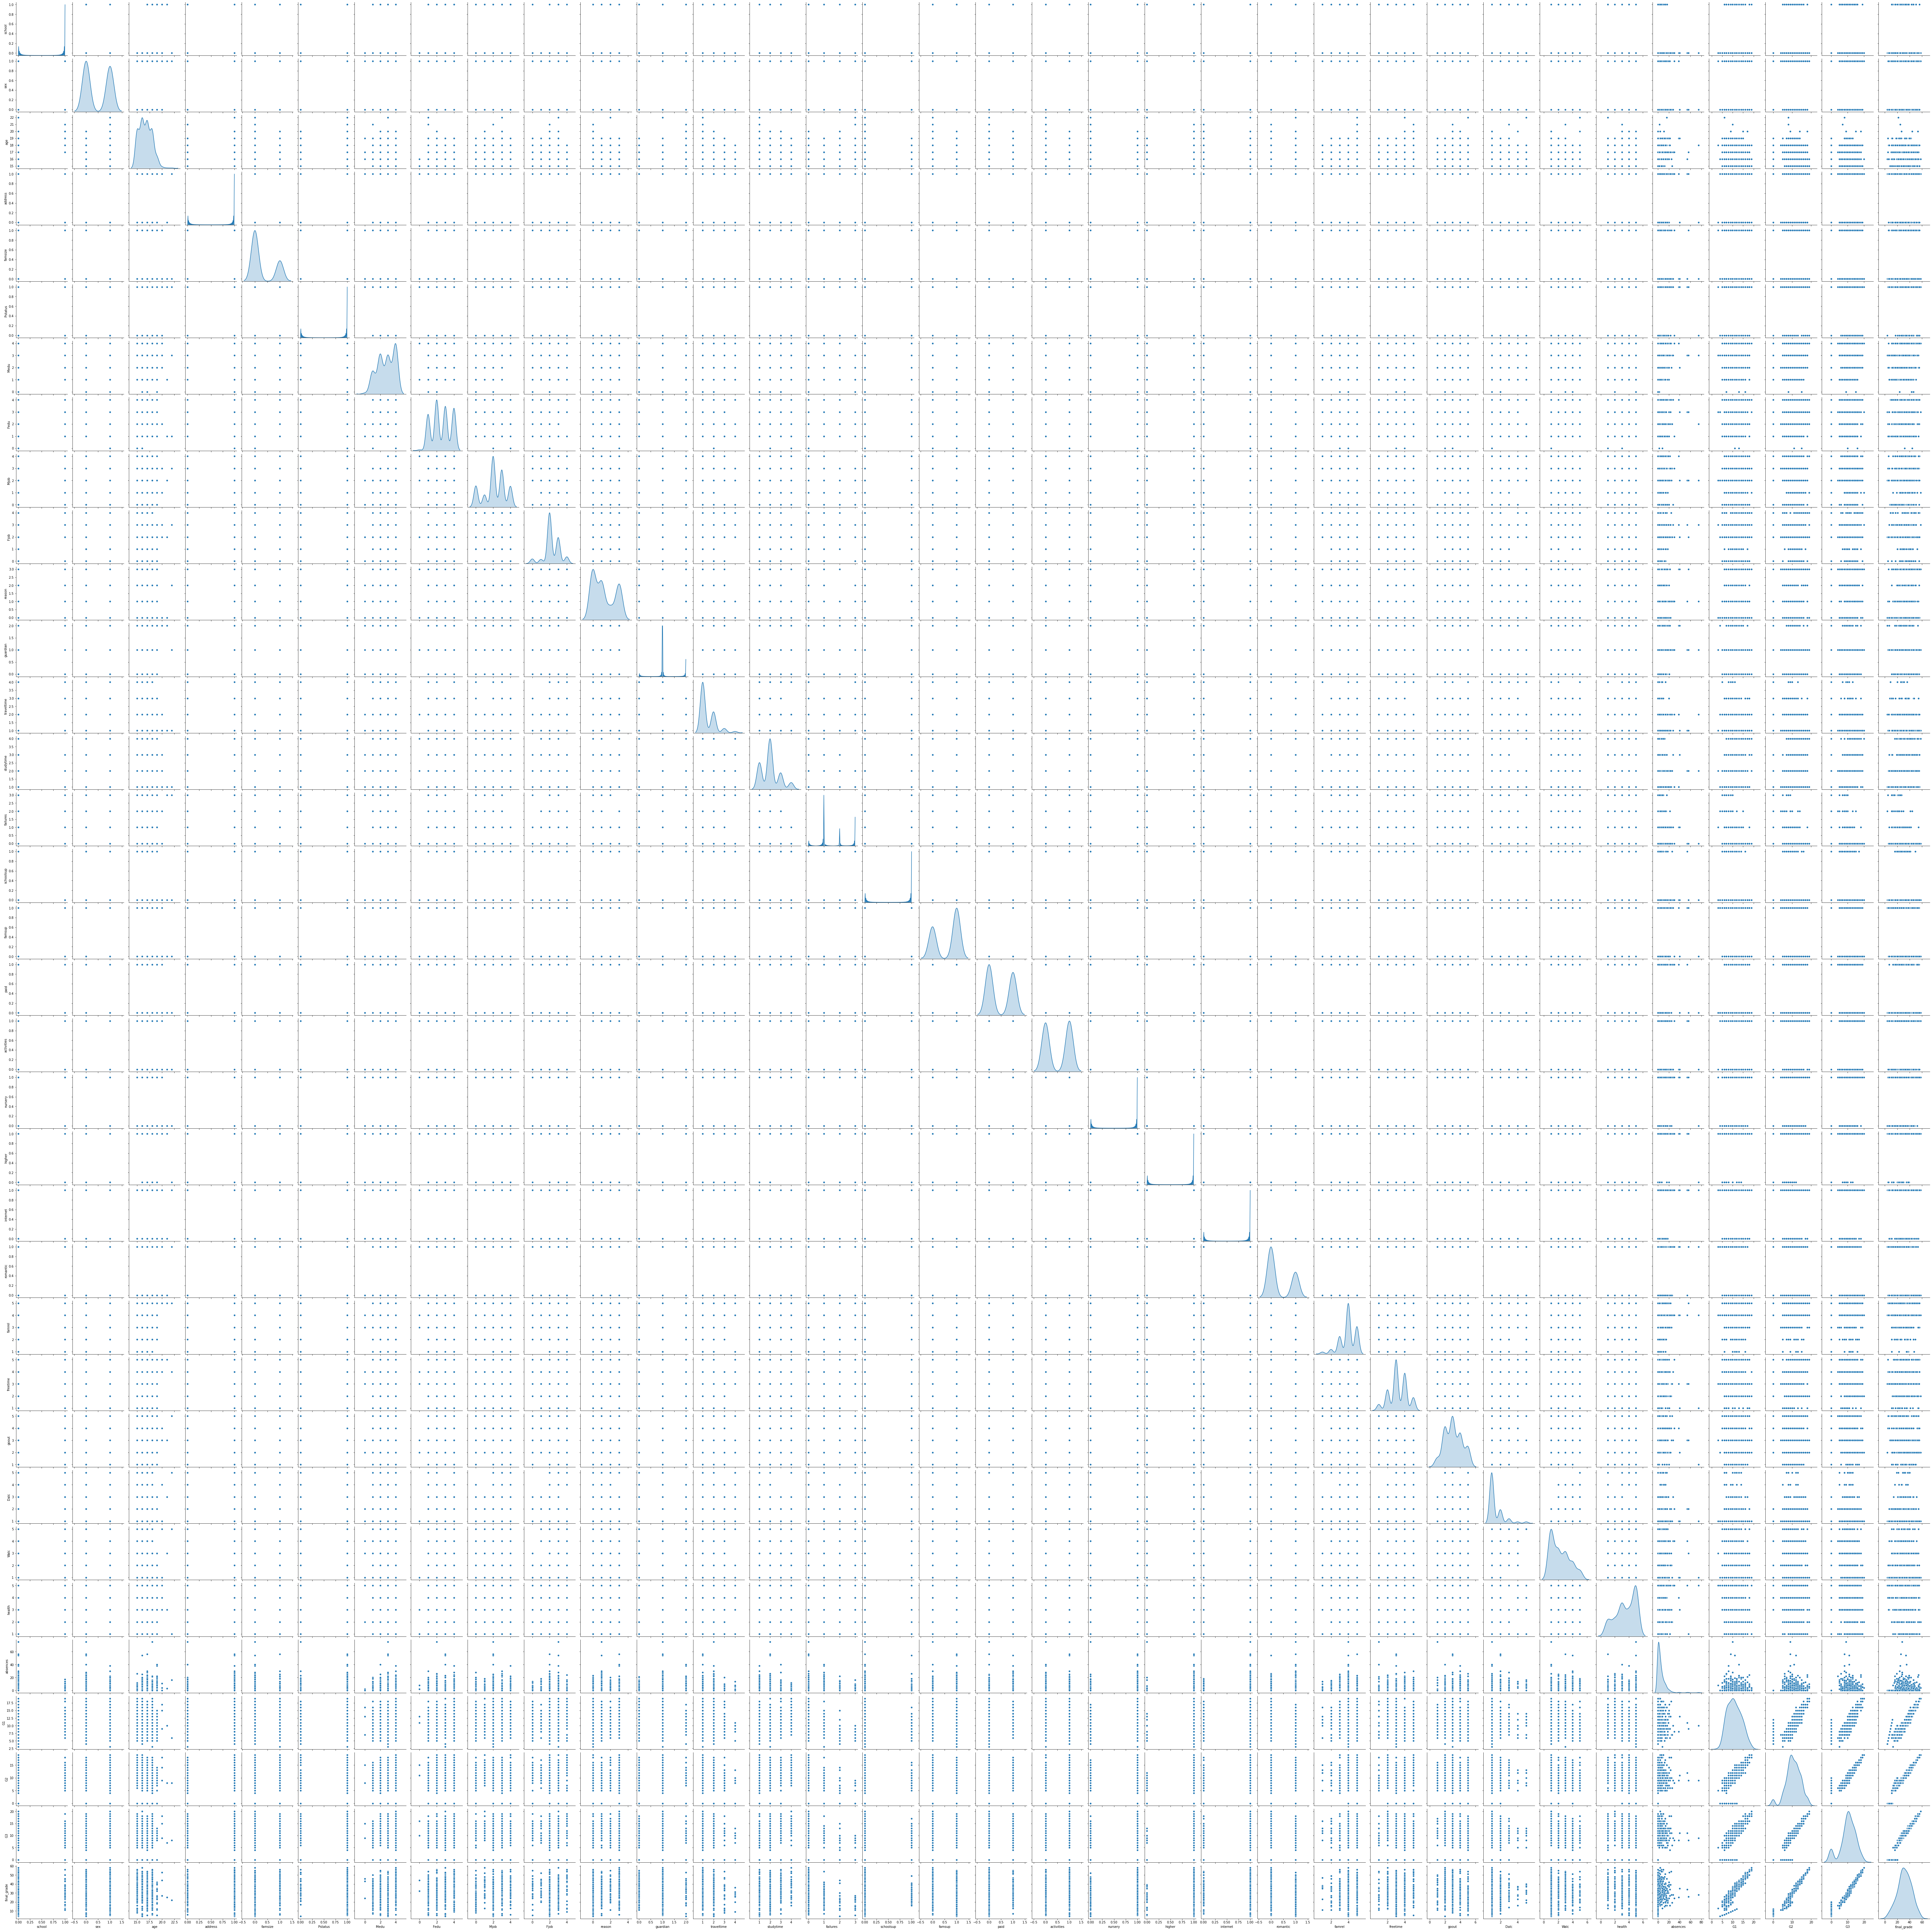

In [51]:
sns.pairplot(df, diag_kind='kde')
plt.show()

Data Analysis

In [52]:
df.shape

(395, 34)

In [53]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,1.255696,0.853165,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,32.037975
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,1.208236,0.536684,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,11.090357
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,25.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,32.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,40.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,58.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       395 non-null    int64
 1   sex          395 non-null    int64
 2   age          395 non-null    int64
 3   address      395 non-null    int64
 4   famsize      395 non-null    int64
 5   Pstatus      395 non-null    int64
 6   Medu         395 non-null    int64
 7   Fedu         395 non-null    int64
 8   Mjob         395 non-null    int64
 9   Fjob         395 non-null    int64
 10  reason       395 non-null    int64
 11  guardian     395 non-null    int64
 12  traveltime   395 non-null    int64
 13  studytime    395 non-null    int64
 14  failures     395 non-null    int64
 15  schoolsup    395 non-null    int64
 16  famsup       395 non-null    int64
 17  paid         395 non-null    int64
 18  activities   395 non-null    int64
 19  nursery      395 non-null    int64
 20  higher    

In [55]:
df.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
final_grade    0
dtype: int64

In [57]:
from sklearn.externals import joblib
joblib.dump(model,"Multiple_Regression_Student.pkl")

['Multiple_Regression_Student.pkl']